In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

In [8]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import os

# Read bounding box CSV
bbox = pd.read_csv('bounding_boxes.csv')


In [9]:
# Rename columns if needed (for safety with parsing)
bbox.columns = ['Index', 'Image Index', 'Finding Label', 'Bbox X', 'Bbox Y', 'Bbox W', 'Bbox H']

In [10]:
bbox.head()

,Index,Image Index,Finding Label,Bbox X,Bbox Y,Bbox W,Bbox H
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


<IPython.core.display.Javascript object>


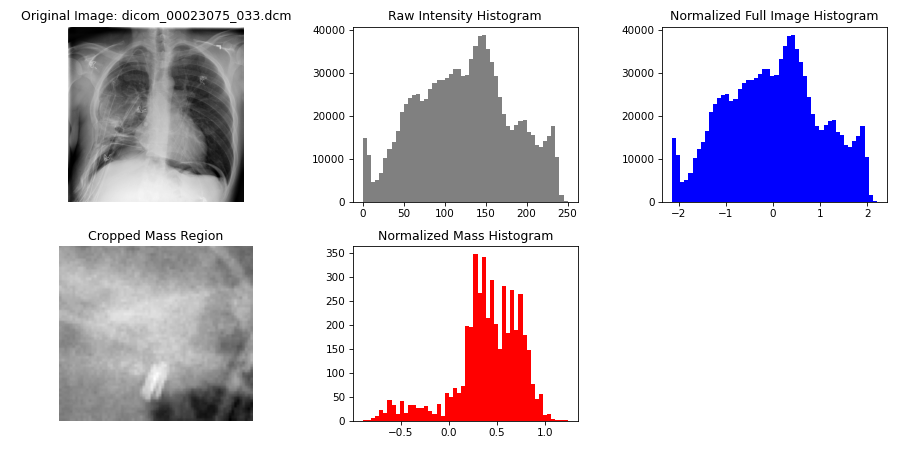


Image: dicom_00023075_033.dcm
Mean intensity: 123.26
Standard deviation: 57.47
Cropped region shape: (65, 72)


<IPython.core.display.Javascript object>


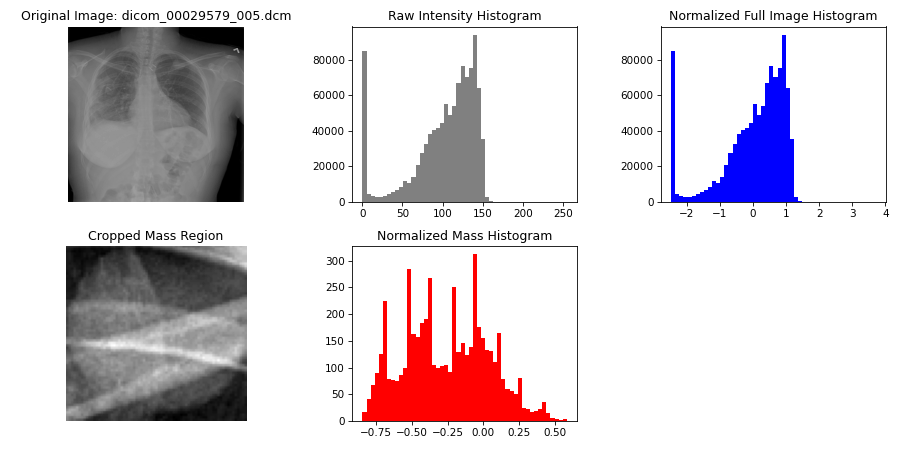


Image: dicom_00029579_005.dcm
Mean intensity: 101.89
Standard deviation: 41.32
Cropped region shape: (71, 73)


<IPython.core.display.Javascript object>


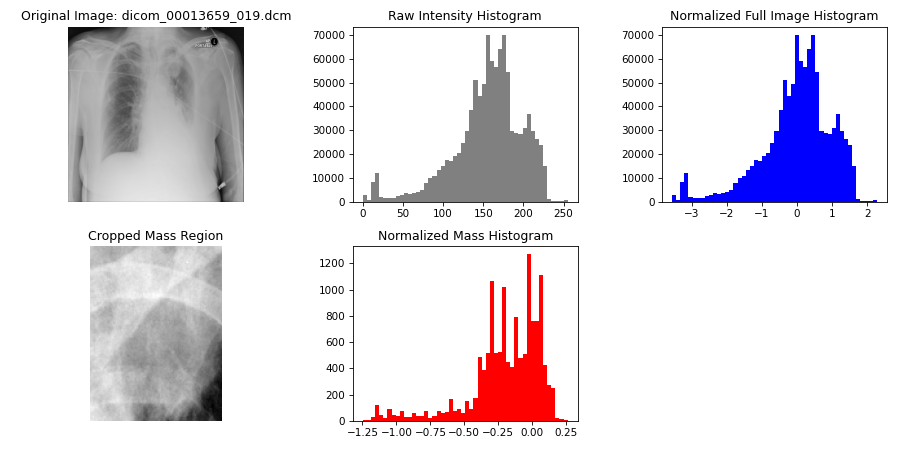


Image: dicom_00013659_019.dcm
Mean intensity: 155.60
Standard deviation: 43.78
Cropped region shape: (136, 102)


In [11]:
# Function to process and visualize each DICOM file
def process_dicom_row(row):
    filename = row['Image Index']
    x, y, w, h = map(int, [row['Bbox X'], row['Bbox Y'], row['Bbox W'], row['Bbox H']])

    # Step 1: Read DICOM
    dcm = pydicom.dcmread(filename)
    img = dcm.pixel_array.astype(np.float32)

    # Step 2: Show original image
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image: {filename}')
    plt.axis('off')

    # Step 3: Histogram of raw intensities
    plt.subplot(2, 3, 2)
    plt.hist(img.flatten(), bins=50, color='gray')
    plt.title('Raw Intensity Histogram')

    # Step 4: Normalize
    img_mean = np.mean(img)
    img_std = np.std(img)
    img_norm = (img - img_mean) / img_std

    # Step 5: Histogram of normalized full image
    plt.subplot(2, 3, 3)
    plt.hist(img_norm.flatten(), bins=50, color='blue')
    plt.title('Normalized Full Image Histogram')

    # Step 6: Crop to bounding box
    mass_crop = img_norm[y:y+h, x:x+w]
    plt.subplot(2, 3, 4)
    plt.imshow(mass_crop, cmap='gray')
    plt.title('Cropped Mass Region')
    plt.axis('off')

    # Step 7: Histogram of normalized mass region
    plt.subplot(2, 3, 5)
    plt.hist(mass_crop.flatten(), bins=50, color='red')
    plt.title('Normalized Mass Histogram')

    # Print summary stats
    print(f"\nImage: {filename}")
    print(f"Mean intensity: {img_mean:.2f}")
    print(f"Standard deviation: {img_std:.2f}")
    print(f"Cropped region shape: {mass_crop.shape}")

    plt.tight_layout()
    plt.show()

# Run for all rows in the dataset (or limit with e.g. [:3])
for i in range(len(bbox)):
    process_dicom_row(bbox.iloc[i])